In [141]:
from __future__ import print_function
import os.path
import pandas as pd
import sys
sys.path.insert(0, '../../')
import seaborn as sns
import numpy as np

import warnings

from natsort import os_sorted

from genepy.utils import helper as h
from genepy.utils import plot as genepyPlot
from genepy.rna import pyDESeq2
import genepy.rna as rna

from bokeh.plotting import *
from bokeh.models import HoverTool
from bokeh.io import output_notebook

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from umap import UMAP

output_notebook()
%load_ext autoreload
%matplotlib inline
%autoreload 2
%load_ext rpy2.ipython

Loading BokehJS ...

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
project = "RNA_RNP_KO"
version = "v1"

# merged rsem_genes_expected_count files (_counts.csv)

In [7]:
projects = ["RNPv2", "RNP_MEIS1"]
project_versions = ["v4", "v1"]

In [16]:
data1 = pd.read_csv("../results/{}/{}_counts.csv".format(projects[0], project_versions[0]), index_col=0)
data1.shape

(27579, 141)

In [17]:
data1.head()

,mr120-MV411-RNP_IRF2BP2-r4,mr121-MV411-RNP_IRF2BP2-r5,mr122-MV411-RNP_IRF2BP2-r6,mr123-MV411-RNP_IRF8-r4,mr124-MV411-RNP_IRF8-r5,mr125-MV411-RNP_IRF8-r6,mr126-MV411-RNP_MEF2D-r4,mr127-MV411-RNP_MEF2D-r5,mr128-MV411-RNP_MEF2D-r6,mr129-MV411-RNP_MYC-r4,...,mr317-MV411-RNP_RUNX2-r13,mr318-MV411-RNP_RUNX2-r14,mr319-MV411-RNP_RUNX1_RUNX2-r5,mr320-MV411-RNP_RUNX1_RUNX2-r6,mr321-MV411-RNP_RUNX1_RUNX2-r7,mr322-MV411-RNP_RUNX1_RUNX2-r8,mr323-MV411-RNP_ZMYND8-r11,mr324-MV411-RNP_ZMYND8-r12,mr325-MV411-RNP_ZMYND8-r13,mr326-MV411-RNP_ZMYND8-r14
TSPAN6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DPM1,1619.00,1938.00,2043.00,2211.00,2243.00,2269.00,1983.00,2451.00,2378.00,2465.00,...,1420.00,1584.00,574.00,370.00,497.00,1158.00,1599.00,1114.00,1305.00,1297.00
SCYL3,464.57,545.06,564.86,611.42,621.91,622.93,542.42,670.02,576.38,846.12,...,175.76,210.01,108.47,95.28,82.48,210.56,260.94,181.08,180.68,205.87
C1orf112,780.43,776.94,908.14,1390.60,1268.10,1244.10,1163.60,1481.00,1332.90,1031.90,...,454.24,550.99,189.53,100.72,191.52,337.44,526.06,405.92,420.32,429.13


In [15]:
data2 = pd.read_csv("../results/{}/{}_counts.csv".format(projects[1], project_versions[1]), index_col=0)
data2.shape

(20835, 8)

In [18]:
data2.head()

,mr351-MV411-DMSO-r1,mr352-MV411-DMSO-r2,mr353-MV411-DMSO-r3,mr354-MV411-DMSO-r4,mr355-MV411-72h_MEIS1-r1,mr356-MV411-72h_MEIS1-r2,mr357-MV411-72h_MEIS1-r3,mr358-MV411-72h_MEIS1-r4
DPM1,817.00,1159.00,1488.00,994.00,813.00,926.00,835.00,1780.00
SCYL3,205.41,322.94,360.41,248.56,203.88,197.67,187.54,375.24
C1orf112,290.59,497.06,537.59,341.44,303.12,272.33,272.46,601.76
FGR,260.00,480.00,511.00,329.00,141.00,138.00,147.00,241.00
CFH,8.00,8.00,10.00,6.00,11.00,4.00,6.00,30.00


get sample names

In [65]:
from gsheets import Sheets
sheets = Sheets.from_files('~/.client_secret_web.json', '~/.storage.json')
url = "https://docs.google.com/spreadsheets/d/1yFLjYB1McU530JnLgL0QIMAKIkVl3kl0_LCHje2gk8U/edit?ts=5fab1071#gid=738732237"
gsheet = sheets.get(url).sheets[12].to_frame()

In [66]:
gsheet = gsheet.loc[gsheet["type"].isin(["RNA", "RNP"])]
gsheet.shape

(268, 14)

In [67]:
gsheet = gsheet.loc[gsheet["ID"].isin([x.split("-")[0] for x in data1.columns.tolist()+data2.columns.tolist()])]
gsheet.shape

(149, 14)

In [69]:
# get MEIS1, MEF2C, and RUNX2 KOs and associated controls
data1_samples = [x for x in data1.columns.tolist() if 
                 any(y in x for y in ["AAVS1", "DMSO", "MEIS1", "MEF2C", "RUNX2"])]
data1_samples = [x for x in data1_samples if not any(y in x for y in ["RUNX1", "MEF2D"])]

In [70]:
samples = data1_samples + data2.columns.tolist()
len(samples)

44

In [71]:
gsheet = gsheet.loc[gsheet["ID"].isin([x.split("-")[0] for x in samples])]
gsheet.shape

(44, 14)

In [72]:
gsheet

,ID,cell line,type,condition,replicate,batch,name,prev_name,fastq1,fastq2,prefix,count folder,fastqc folder,fastq folder
134,mr135,MV411,RNA,RNP_RUNX2,4,NaN,mr135-MV411-RNP_RUNX2-r4,20200304_16_MP7624_S16,gs://amlproject/RNA/RNPv2/20200304_16_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_16_MP7624_S...,NaN,NaN,NaN,NaN
135,mr136,MV411,RNA,RNP_RUNX2,5,NaN,mr136-MV411-RNP_RUNX2-r5,20200304_17_MP7624_S17,gs://amlproject/RNA/RNPv2/20200304_17_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_17_MP7624_S...,NaN,NaN,NaN,NaN
136,mr137,MV411,RNA,RNP_RUNX2,6,NaN,mr137-MV411-RNP_RUNX2-r6,20200304_18_MP7624_S18,gs://amlproject/RNA/RNPv2/20200304_18_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_18_MP7624_S...,NaN,NaN,NaN,NaN
155,mr156,MV411,RNA,RNP_MEF2C,4,NaN,mr156-MV411-RNP_MEF2C-r4,20200304_37_MP7624_S37,gs://amlproject/RNA/RNPv2/20200304_37_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_37_MP7624_S...,NaN,NaN,NaN,NaN
156,mr157,MV411,RNA,RNP_MEF2C,5,NaN,mr157-MV411-RNP_MEF2C-r5,20200304_38_MP7624_S38,gs://amlproject/RNA/RNPv2/20200304_38_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_38_MP7624_S...,NaN,NaN,NaN,NaN
157,mr158,MV411,RNA,RNP_MEF2C,6,NaN,mr158-MV411-RNP_MEF2C-r6,20200304_39_MP7624_S39,gs://amlproject/RNA/RNPv2/20200304_39_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_39_MP7624_S...,NaN,NaN,NaN,NaN
158,mr159,MV411,RNA,RNP_MEIS1,4,NaN,mr159-MV411-RNP_MEIS1-r4,20200304_40_MP7624_S40,gs://amlproject/RNA/RNPv2/20200304_40_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_40_MP7624_S...,NaN,NaN,NaN,NaN
159,mr160,MV411,RNA,RNP_MEIS1,5,NaN,mr160-MV411-RNP_MEIS1-r5,20200304_41_MP7624_S41,gs://amlproject/RNA/RNPv2/20200304_41_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_41_MP7624_S...,NaN,NaN,NaN,NaN
160,mr161,MV411,RNA,RNP_MEIS1,6,NaN,mr161-MV411-RNP_MEIS1-r6,20200304_42_MP7624_S42,gs://amlproject/RNA/RNPv2/20200304_42_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_42_MP7624_S...,NaN,NaN,NaN,NaN
185,mr186,MV411,RNA,RNP_AAVS1,1,NaN,mr186-MV411-RNP_AAVS1-r1,20200304_67_MP7624_S67,gs://amlproject/RNA/RNPv2/20200304_67_MP7624_S...,gs://amlproject/RNA/RNPv2/20200304_67_MP7624_S...,NaN,NaN,NaN,NaN


<BarContainer object of 4 artists>

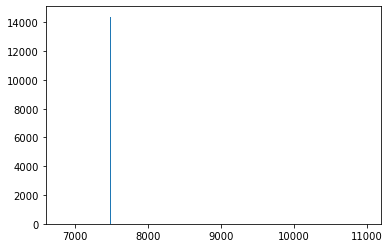

In [76]:
plt.bar(data2.loc["IRF8", data2.columns.tolist()[:4]], data2.loc["IRF8", data2.columns.tolist()[4:]])

In [79]:
data2.loc["IRF8", data2.columns.tolist()[:4]].mean()

8969.0

In [80]:
data2.loc["IRF8", data2.columns.tolist()[4:]].mean()

8882.25

<BarContainer object of 2 artists>

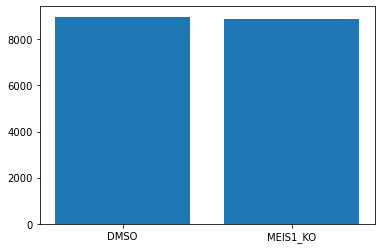

In [83]:
plt.bar(["DMSO", "MEIS1_KO"],[data2.loc["IRF8", data2.columns.tolist()[:4]].mean(), data2.loc["IRF8", data2.columns.tolist()[4:]].mean()])

In [78]:
pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

,lab,val
0,A,10
1,B,30
2,C,20


# rsem genes tpm

In [215]:
def convertGenes(gene_mapping, listofgenes, from_idtype="ensembl_gene_id", to_idtype="hgnc_symbol"):
    """
    Given a list of genes, will convert to different ID type
    
    Args:
    -----
    listofgenes: list of genes
    from_idtype: one of "ensembl_gene_id","clone_based_ensembl_gene","hgnc_symbol","gene_biotype","entrezgene_id", the gene name format
    to_idtype: one of "ensembl_gene_id","clone_based_ensembl_gene","hgnc_symbol","gene_biotype","entrezgene_id", the gene name format
    
    Returns:
    -------
    1: the new names for each genes that were matched else the same name
    2: the names of genes that could not be matched
    """

    not_parsed = []
    renamed = []
    b = 0
    to = {}

    for i, val in gene_mapping.iterrows():
        to[val[from_idtype]] = val[to_idtype]

    for i, val in enumerate(listofgenes):
        if from_idtype == "ensembl_gene_id":
            val = val.split(".")[0]
        try:
            a = to[val]
            renamed.append(a)
        except KeyError:
            b += 1
            not_parsed.append(val)
            renamed.append(val)
    print(str(b) + " count not be parsed... we don't have all genes already")
    return(renamed, not_parsed)

## merge and convert to gene

In [92]:
project = "RNP_KOs"

In [96]:
res_folder = "../results/{}".format(project)

In [365]:
tpm_files = ! ls $res_folder/*rsem_genes_tpm.txt

In [366]:
tpm_files

['../results/RNP_KOs/RNP_MEIS1.rsem_genes_tpm.txt',
 '../results/RNP_KOs/RNPv3.rsem_genes_tpm.txt',
 '../results/RNP_KOs/RNPv4.rsem_genes_tpm.txt',
 '../results/RNP_KOs/RNPv5.rsem_genes_tpm.txt']

In [367]:
samplesets = ["RNP_MEIS1", "RNPv3", "RNPv4", "RNPv5"]

In [425]:
#v = "RNPv2_b3"
v = "RNP_MEIS1_b1"

### rsem_genes_tpm

In [426]:
# RNP_MEIS1
MEIS1_samples = pd.read_csv(tpm_files[0], sep='\t').drop(
    columns=["transcript_id(s)"]).set_index("gene_id").columns.tolist()
print(len(MEIS1_samples))

8


In [369]:
# RNPv3
v3_samples = pd.read_csv(tpm_files[1], sep='\t').drop(
    columns=["transcript_id(s)"]).set_index("gene_id").columns.tolist()
print(len(v3_samples))

73


In [370]:
# RNPv4
v4_samples = pd.read_csv(tpm_files[2], sep='\t').drop(
    columns=["transcript_id(s)"]).set_index("gene_id").columns.tolist()
print(len(v4_samples))

32


In [371]:
# RNPv5
v5_samples = pd.read_csv(tpm_files[3], sep='\t').drop(
    columns=["transcript_id(s)"]).set_index("gene_id").columns.tolist()
print(len(v5_samples))

36


__open file__

In [427]:
rsem_genes_tpm = pd.read_csv(tpm_files[0], sep='\t')

In [428]:
data = rsem_genes_tpm.drop(columns=["transcript_id(s)"]).set_index("gene_id")

In [351]:
#data = pd.concat([rsem_genes_tpm.drop(columns=["transcript_id(s)"]).set_index("gene_id"),
#                  pd.read_csv(tpm_files[2], sep='\t').drop(columns=["transcript_id(s)"]).set_index("gene_id"),
#                  pd.read_csv(tpm_files[3], sep='\t').drop(columns=["transcript_id(s)"]).set_index("gene_id"),
#                  pd.read_csv(tpm_files[0], sep='\t').drop(columns=["transcript_id(s)"]).set_index("gene_id")],axis=1)

In [429]:
print(data.shape)
data.head()

(58813, 8)


,mr351-MV411-DMSO-r1,mr352-MV411-DMSO-r2,mr353-MV411-DMSO-r3,mr354-MV411-DMSO-r4,mr355-MV411-72h_MEIS1-r1,mr356-MV411-72h_MEIS1-r2,mr357-MV411-72h_MEIS1-r3,mr358-MV411-72h_MEIS1-r4
gene_id,,,,,,,,
ENSG00000000003.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.12,66.30,59.06,69.49,65.84,67.04,79.19,80.25,67.75
ENSG00000000457.13,3.19,3.12,3.16,3.09,2.77,2.80,2.79,2.45
ENSG00000000460.16,11.72,10.67,11.33,9.94,10.80,9.19,10.50,9.88


In [430]:
rnp_samples = data.columns.tolist()
print(len(rnp_samples))

8


In [431]:
tpm_genes = convertGenes(gene_mapping, data.index.tolist())[0]
data.index = list(tpm_genes)

1676 count not be parsed... we don't have all genes already


In [432]:
print(data.shape)
data.head()

(58813, 8)


,mr351-MV411-DMSO-r1,mr352-MV411-DMSO-r2,mr353-MV411-DMSO-r3,mr354-MV411-DMSO-r4,mr355-MV411-72h_MEIS1-r1,mr356-MV411-72h_MEIS1-r2,mr357-MV411-72h_MEIS1-r3,mr358-MV411-72h_MEIS1-r4
TSPAN6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DPM1,66.30,59.06,69.49,65.84,67.04,79.19,80.25,67.75
SCYL3,3.19,3.12,3.16,3.09,2.77,2.80,2.79,2.45
C1orf112,11.72,10.67,11.33,9.94,10.80,9.19,10.50,9.88


In [433]:
rename = {"1": "mr120-MV411-RNP_IRF2BP2-r4",
"2": "mr121-MV411-RNP_IRF2BP2-r5",
"3": "mr122-MV411-RNP_IRF2BP2-r6",
"4": "mr123-MV411-RNP_IRF8-r4",
"5": "mr124-MV411-RNP_IRF8-r5",
"6": "mr125-MV411-RNP_IRF8-r6",
"7": "mr126-MV411-RNP_MEF2D-r4",
"8": "mr127-MV411-RNP_MEF2D-r5",
"9": "mr128-MV411-RNP_MEF2D-r6",
"10": "mr129-MV411-RNP_MYC-r4",
"11": "mr130-MV411-RNP_MYC-r5",
"12": "mr131-MV411-RNP_MYC-r6",
"13": "mr132-MV411-RNP_RUNX1-r4",
"14": "mr133-MV411-RNP_RUNX1-r5",
"15": "mr134-MV411-RNP_RUNX1-r6",
"16": "mr135-MV411-RNP_RUNX2-r4",
"17": "mr136-MV411-RNP_RUNX2-r5",
"18": "mr137-MV411-RNP_RUNX2-r6",
"19": "mr138-MV411-RNP_SPI1-r4",
"20": "mr139-MV411-RNP_SPI1-r5",
"21": "mr140-MV411-RNP_SPI1-r6",
"22": "mr141-MV411-RNP_ZMYND8-r4",
"23": "mr142-MV411-RNP_ZMYND8-r5",
"24": "mr143-MV411-RNP_ZMYND8-r6",
"25": "mr144-MV411-RNP_LMO2-r4",
"26": "mr145-MV411-RNP_LMO2-r5",
"27": "mr146-MV411-RNP_LMO2-r6",
"28": "mr147-MV411-RNP_LYL1-r4",
"29": "mr148-MV411-RNP_LYL1-r5",
"30": "mr149-MV411-RNP_LYL1-r6",
"31": "mr150-MV411-RNP_MAX-r4",
"32": "mr151-MV411-RNP_MAX-r5",
"33": "mr152-MV411-RNP_MAX-r6",
"34": "mr153-MV411-RNP_ZEB2-r4",
"35": "mr154-MV411-RNP_ZEB2-r5",
"36": "mr155-MV411-RNP_ZEB2-r6",
"37": "mr156-MV411-RNP_MEF2C-r4",
"38": "mr157-MV411-RNP_MEF2C-r5",
"39": "mr158-MV411-RNP_MEF2C-r6",
"40": "mr159-MV411-RNP_MEIS1-r4",
"41": "mr160-MV411-RNP_MEIS1-r5",
"42": "mr161-MV411-RNP_MEIS1-r6",
"43": "mr162-MV411-RNP_FLI1-r4",
"44": "mr163-MV411-RNP_FLI1-r5",
"45": "mr164-MV411-RNP_FLI1-r6",
"46": "mr165-MV411-RNP_ELF2-r4",
"47": "mr166-MV411-RNP_ELF2-r5",
"48": "mr167-MV411-RNP_ELF2-r6",
"49": "mr168-MV411-RNP_GFI1-r4",
"50": "mr169-MV411-RNP_GFI1-r5",
"51": "mr170-MV411-RNP_GFI1-r6",
"52": "mr171-MV411-RNP_IKZF1-r4",
"53": "mr172-MV411-RNP_IKZF1-r5",
"54": "mr173-MV411-RNP_IKZF1-r6",
"55": "mr174-MV411-RNP_CEBPA-r4",
"56": "mr175-MV411-RNP_CEBPA-r5",
"57": "mr176-MV411-RNP_CEBPA-r6",
"58": "mr177-MV411-RNP_MYB-r4",
"59": "mr178-MV411-RNP_MYB-r5",
"60": "mr179-MV411-RNP_MYB-r6",
"61": "mr180-MV411-RNP_MYBL2-r1",
"62": "mr181-MV411-RNP_MYBL2-r2",
"63": "mr182-MV411-RNP_MYBL2-r3",
"64": "mr183-MV411-RNP_HOXA9-r4",
"65": "mr184-MV411-RNP_HOXA9-r5",
"66": "mr185-MV411-RNP_HOXA9-r6",
"67": "mr186-MV411-RNP_AAVS1-r1",
"68": "mr187-MV411-RNP_AAVS1-r2",
"69": "mr188-MV411-RNP_AAVS1-r3",
"70": "mr189-MV411-RNP_SPI1-r7",
"71": "mr190-MV411-RNP_SP1-r4",
"72": "mr191-MV411-RNP_SP1-r5",
"73": "mr192-MV411-RNP_SP1-r6",
"mr241-MV411-RNP_MEF2D-r8": "mr221-MV411-RNP_AAVS1-r5-new",
"mr233-MV411-RNP_RUNX1_RUNX2-r2": "mr241-MV411-RNP_MEF2D-r8",
"mr224-MV411-RNP_RUNX1-r7": "mr233-MV411-RNP_RUNX1RUNX2-r2",
"mr247-MV411-RNP_ZMYND8-r10": "mr224-MV411-RNP_RUNX1-r7",
"mr239-MV411-RNP_MEF2C-r10": "mr247-MV411-RNP_ZMYND8-r10",
"mr231-MV411-RNP_RUNX2-r10": "mr239-MV411-RNP_MEF2C-r10",
"mr222-MV411-RNP_AAVS1-r6": "mr231-MV411-RNP_RUNX2-r10",
"mr245-MV411-RNP_ZMYND8-r8": "mr222-MV411-RNP_AAVS1-r6",
"mr237-MV411-RNP_MEF2C-r8": "mr245-MV411-RNP_ZMYND8-r8",
"mr228-MV411-RNP_RUNX2-r7": "mr237-MV411-RNP_MEF2C-r8",
"mr251-MV411-RNP_SP1-r10": "mr228-MV411-RNP_RUNX2-r7",
"mr244-MV411-RNP_ZMYND8-r7": "mr251-MV411-RNP_SP1-r10",
"mr236-MV411-RNP_MEF2C-r7": "mr244-MV411-RNP_ZMYND8-r7",
"mr227-MV411-RNP_RUNX1-r10": "mr236-MV411-RNP_MEF2C-r7",
"mr250-MV411-RNP_SP1-r9": "mr227-MV411-RNP_RUNX1-r10",
"mr243-MV411-RNP_MEF2D-r10": "mr250-MV411-RNP_SP1-r9",
"mr235-MV411-RNP_RUNX1_RUNX2-r4": "mr243-MV411-RNP_MEF2D-r10",
"mr226-MV411-RNP_RUNX1-r9": "mr235-MV411-RNP_RUNX1RUNX2-r4",
"mr249-MV411-RNP_SP1-r8": "mr226-MV411-RNP_RUNX1-r9",
"mr242-MV411-RNP_MEF2D-r9": "mr249-MV411-RNP_SP1-r8",
"mr234-MV411-RNP_RUNX1_RUNX2-r3": "mr242-MV411-RNP_MEF2D-r9",
"mr225-MV411-RNP_RUNX1-r8": "mr234-MV411-RNP_RUNX1RUNX2-r3",
"mr248-MV411-RNP_SP1-r7": "mr225-MV411-RNP_RUNX1-r8",
"mr240-MV411-RNP_MEF2D-r7": "mr248-MV411-RNP_SP1-r7",
"mr232-MV411-RNP_RUNX1_RUNX2-r1": "mr240-MV411-RNP_MEF2D-r7",
"mr223-MV411-RNP_AAVS1-r7": "mr232-MV411-RNP_RUNX1RUNX2-r1",
"mr246-MV411-RNP_ZMYND8-r9": "mr223-MV411-RNP_AAVS1-r7",
"mr238-MV411-RNP_MEF2C-r9": "mr246-MV411-RNP_ZMYND8-r9",
"mr229-MV411-RNP_RUNX2-r8": "mr238-MV411-RNP_MEF2C-r9",
"mr220-MV411-RNP_AAVS1-r4": "mr229-MV411-RNP_RUNX2-r8",
"mr230-MV411-RNP_RUNX2-r9": "mr220-MV411-RNP_AAVS1-r4",
"mr221-MV411-RNP_AAVS1-r5": "mr230-MV411-RNP_RUNX2-r9",
"mr221-MV411-RNP_AAVS1-r5-new": "mr221-MV411-RNP_AAVS1-r5"}

In [434]:
data.columns = [rename[i] if i in rename else i for i in data.columns]

### post processing and filtering

In [435]:
def dedup_df_genes(df):
    ''' sum rows with the same gene index and remove duplicate '''
    if df.shape[0] != len(df.index.drop_duplicates()):
        print("Duplicate gene rows!")
        print("{} rows | {} unique genes".format(df.shape[0], len(df.index.drop_duplicates())))
        print("Summing of duplicate gene rows.")
        
    # sum duplicate rows, same row order
    duplicate_genes = df.index[df.index.duplicated()].tolist()
    df = df.groupby(df.index).sum().loc[df.index.drop_duplicates()]
    if df.shape[0] != len(df.index.drop_duplicates()):
        raise ValueError(
            "Cannot collapse duplicate gene rows."
        )
    
    return df, duplicate_genes

In [436]:
print(data.shape)

(58813, 8)


In [437]:
# merge rows with same gene
data, duplicate_genes = dedup_df_genes(data)

Duplicate gene rows!
58813 rows | 58756 unique genes
Summing of duplicate gene rows.


In [438]:
# remove regions with a variance of 0 across all samples
toremove = np.argwhere(data.values.var(1)==0)
print(len(toremove.ravel()))

data = data.drop(data.iloc[toremove.ravel()].index,0)
print(data.shape)

31536
(27220, 8)


/tmp/ipykernel_7355/2246380173.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(data.iloc[toremove.ravel()].index,0)


In [439]:
# remove unconverted gene regions
ensg = data[data.index.str.contains('ENSG00')]
data = data[~data.index.str.contains('ENSG00')]

print(ensg.shape)
print(data.shape)

(228, 8)
(26992, 8)


### save table

In [440]:
v

'RNP_MEIS1_b1'

In [441]:
# save table
data.to_csv(res_folder+'/'+v+'_merged_tpm.csv')

In [442]:
data

,mr351-MV411-DMSO-r1,mr352-MV411-DMSO-r2,mr353-MV411-DMSO-r3,mr354-MV411-DMSO-r4,mr355-MV411-72h_MEIS1-r1,mr356-MV411-72h_MEIS1-r2,mr357-MV411-72h_MEIS1-r3,mr358-MV411-72h_MEIS1-r4
DPM1,66.30,59.06,69.49,65.84,67.04,79.19,80.25,67.75
SCYL3,3.19,3.12,3.16,3.09,2.77,2.80,2.79,2.45
C1orf112,11.72,10.67,11.33,9.94,10.80,9.19,10.50,9.88
FGR,9.91,10.67,10.27,9.20,4.79,5.08,5.74,4.15
CFH,0.40,0.18,0.16,0.14,0.32,0.07,0.13,0.42
...,...,...,...,...,...,...,...,...
ERCC-00164,0.61,0.27,0.35,0.71,0.44,0.74,0.10,0.70
ERCC-00165,31.16,39.42,51.31,40.16,63.87,56.74,52.35,54.94
ERCC-00168,0.35,0.55,1.26,1.07,1.40,0.65,0.60,1.47
ERCC-00170,3.89,1.70,3.77,4.41,4.65,4.82,2.82,5.35


In [422]:
data

,mr291-MV411-RNP_AAVS1-r8,mr292-MV411-RNP_AAVS1-r9,mr293-MV411-RNP_AAVS1-r10,mr294-MV411-RNP_AAVS1-r11,mr295-MV411-RNP_MYB-r7,mr296-MV411-RNP_MYB-r8,mr297-MV411-RNP_MYB-r9,mr298-MV411-RNP_MYB-r10,mr299-MV411-RNP_MEF2D-r11,mr300-MV411-RNP_MEF2D-r12,...,mr317-MV411-RNP_RUNX2-r13,mr318-MV411-RNP_RUNX2-r14,mr319-MV411-RNP_RUNX1_RUNX2-r5,mr320-MV411-RNP_RUNX1_RUNX2-r6,mr321-MV411-RNP_RUNX1_RUNX2-r7,mr322-MV411-RNP_RUNX1_RUNX2-r8,mr323-MV411-RNP_ZMYND8-r11,mr324-MV411-RNP_ZMYND8-r12,mr325-MV411-RNP_ZMYND8-r13,mr326-MV411-RNP_ZMYND8-r14
TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DPM1,51.93,66.59,66.30,78.00,44.55,46.40,41.00,38.44,38.54,50.80,...,67.68,66.47,38.86,31.92,32.41,37.62,59.16,51.91,56.36,53.89
SCYL3,0.93,1.19,1.39,1.59,1.75,0.99,1.59,1.12,1.40,1.36,...,1.64,1.68,1.33,1.54,0.91,0.96,1.74,1.59,1.32,1.43
C1orf112,8.65,6.60,8.69,9.74,6.27,4.69,8.85,6.34,5.88,5.15,...,9.38,8.96,6.34,4.39,4.62,4.76,6.83,6.89,6.75,5.78
FGR,7.43,6.40,7.55,5.32,18.31,11.51,20.19,20.10,8.03,6.60,...,7.26,8.11,6.68,6.09,4.72,5.95,13.04,12.39,14.49,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00164,0.44,1.22,0.39,0.62,0.66,2.57,0.23,0.56,0.19,0.48,...,0.40,0.59,0.56,0.54,0.49,0.16,0.31,0.45,0.46,0.40
ERCC-00165,121.35,72.20,87.32,63.25,169.23,66.74,191.92,261.86,110.59,109.99,...,62.75,73.67,173.10,210.38,238.33,217.68,89.81,125.94,104.66,99.70
ERCC-00168,0.49,2.01,0.51,2.17,1.13,1.43,0.97,1.22,0.72,1.00,...,0.55,0.95,0.28,0.54,1.05,0.96,0.23,1.35,1.25,0.71
ERCC-00170,4.01,4.82,3.27,4.91,4.01,8.14,4.74,6.01,2.11,3.12,...,2.56,2.03,5.54,6.62,4.75,4.41,2.38,5.31,3.80,3.74
